<a href="https://colab.research.google.com/github/SADUDDIN/Yolo8_Cat_Vs_Dog/blob/main/YoloProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Dependencies

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import shutil
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import plotly.express as px
import random
import cv2
import tensorflow as tf

In [4]:


from sklearn.model_selection import train_test_split
from shutil import copyfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Splitting Datasets

In [5]:
cats = os.listdir('/content/drive/MyDrive/PetImages/Cat')
dogs = os.listdir('/content/drive/MyDrive/PetImages/Dog')



In [6]:
sample_cats = random.sample(cats,3000 )
sample_dogs = random.sample(dogs,3000 )

In [7]:
_cats, test_cats = train_test_split(sample_cats, test_size=0.2, random_state=42)
_dogs, test_dogs = train_test_split(sample_dogs, test_size=0.2, random_state=42)

In [8]:
train_cats, val_cats = train_test_split(_cats, test_size=0.2, random_state=42)
train_dogs, val_dogs = train_test_split(_dogs, test_size=0.2, random_state=42)

In [9]:
train_cats


['11862.jpg',
 '7642.jpg',
 '7156.jpg',
 '11337.jpg',
 '4845.jpg',
 '10730.jpg',
 '5990.jpg',
 '4518.jpg',
 '8208.jpg',
 '150.jpg',
 '11903.jpg',
 '2289.jpg',
 '9959.jpg',
 '1892.jpg',
 '4045.jpg',
 '9222.jpg',
 '8195.jpg',
 '3496.jpg',
 '2170.jpg',
 '9294.jpg',
 '1516.jpg',
 '3023.jpg',
 '1706.jpg',
 '5624.jpg',
 '8875.jpg',
 '10150.jpg',
 '4088.jpg',
 '8504.jpg',
 '4911.jpg',
 '7732.jpg',
 '8705.jpg',
 '7777.jpg',
 '565.jpg',
 '12490.jpg',
 '5216.jpg',
 '1498.jpg',
 '6903.jpg',
 '2550.jpg',
 '7405.jpg',
 '4191.jpg',
 '4390.jpg',
 '5925.jpg',
 '2397.jpg',
 '4520.jpg',
 '11123.jpg',
 '7184.jpg',
 '3973.jpg',
 '4861.jpg',
 '7618.jpg',
 '6199.jpg',
 '10915.jpg',
 '4424.jpg',
 '11230.jpg',
 '11978.jpg',
 '8376.jpg',
 '4386.jpg',
 '5909.jpg',
 '7912.jpg',
 '10509.jpg',
 '5613.jpg',
 '892.jpg',
 '8830.jpg',
 '881.jpg',
 '6654.jpg',
 '1249.jpg',
 '6839.jpg',
 '12431.jpg',
 '9606.jpg',
 '5254.jpg',
 '3269.jpg',
 '9136.jpg',
 '5991.jpg',
 '6219.jpg',
 '4170.jpg',
 '2650.jpg',
 '6770.jpg',
 '37

In [10]:
print('the number of training cats and dogs',len(train_cats),len(train_dogs))
print('the number of testing cats and dogs',len(test_cats),len(test_dogs))

the number of training cats and dogs 1920 1920
the number of testing cats and dogs 600 600


#Making Directory

In [ ]:
# for results of yolo model
os.makedirs('/content/drive/MyDrive/runs_backup', exist_ok=True)

In [ ]:
os.makedirs('/content/drive/MyDrive/PetImagesYOLO', exist_ok=True)

In [ ]:
os.makedirs('/content/drive/MyDrive/PetImagesYOLO/train/cat', exist_ok=True)
os.makedirs('/content/drive/MyDrive/PetImagesYOLO/train/dog', exist_ok=True)
os.makedirs('/content/drive/MyDrive/PetImagesYOLO/test/cat', exist_ok=True)
os.makedirs('/content/drive/MyDrive/PetImagesYOLO/test/dog', exist_ok=True)


In [ ]:
os.makedirs('/content/drive/MyDrive/PetImagesYOLO/val/cat', exist_ok=True)
os.makedirs('/content/drive/MyDrive/PetImagesYOLO/val/dog', exist_ok=True)

#Copying the files

In [ ]:
def copy_images(filenames, src_dir, dst_dir):
    for filename in filenames:
        src = os.path.join(src_dir, filename)
        dst = os.path.join(dst_dir, filename)
        shutil.copyfile(src, dst)


In [ ]:
copy_images(train_cats, '/content/drive/MyDrive/PetImages/Cat', '/content/drive/MyDrive/PetImagesYOLO/train/cat')


In [ ]:
copy_images(train_dogs, '/content/drive/MyDrive/PetImages/Dog', '/content/drive/MyDrive/PetImagesYOLO/train/dog')

In [ ]:
copy_images(test_cats, '/content/drive/MyDrive/PetImages/Cat', '/content/drive/MyDrive/PetImagesYOLO/test/cat')
copy_images(test_dogs, '/content/drive/MyDrive/PetImages/Dog', '/content/drive/MyDrive/PetImagesYOLO/test/dog')

In [ ]:
copy_images(val_cats, '/content/drive/MyDrive/PetImages/Cat', '/content/drive/MyDrive/PetImagesYOLO/val/cat')
copy_images(val_dogs, '/content/drive/MyDrive/PetImages/Dog', '/content/drive/MyDrive/PetImagesYOLO/val/dog')

#Renaming the files

In [ ]:
def rename_images_with_class(directory, class_label):
    """
    Rename images in a directory by appending a class label to their original names.

    Args:
    - directory (str): Path to the directory containing images.
    - class_label (str): Class label to append to image names.

    Returns:
    - None
    """

    # Iterate over files in the directory
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):  # Assuming all images have the .png extension
            original_path = os.path.join(directory, filename)

            # Extract the image number from the filename (assuming it's before the '.png' extension)
            image_number = filename.split(".")[0]

            # Rename the image by appending the class label
            new_filename = f"{image_number}_{class_label}.jpg"
            new_path = os.path.join(directory, new_filename)

            # Rename the file
            os.rename(original_path, new_path)

In [ ]:
rename_images_with_class('/content/drive/MyDrive/PetImagesYOLO/test/cat', 'cat')

In [ ]:
rename_images_with_class('/content/drive/MyDrive/PetImagesYOLO/test/dog', 'dog')
rename_images_with_class('/content/drive/MyDrive/PetImagesYOLO/train/cat', 'cat')
rename_images_with_class('/content/drive/MyDrive/PetImagesYOLO/train/dog', 'dog')

In [ ]:
rename_images_with_class('/content/drive/MyDrive/PetImagesYOLO/val/cat', 'cat')
rename_images_with_class('/content/drive/MyDrive/PetImagesYOLO/val/dog', 'dog')

#converting jpg to png

In [ ]:
def convert_jpg_to_png_inplace(directory):
    """
    Convert JPEG images to PNG format and overwrite the original JPEG files.

    Args:
    - directory (str): Path to the directory containing JPEG images.

    Returns:
    - None
    """

    # Iterate over JPEG files in the directory
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".jpeg"):
            jpg_path = os.path.join(directory, filename)

            # Open the JPEG image using Pillow
            jpg_image = Image.open(jpg_path)

            # Construct the output PNG file path
            png_path = os.path.splitext(jpg_path)[0] + ".png"

            # Save the image in PNG format, overwriting the original JPEG file
            jpg_image.save(png_path, "PNG")

            # Delete the original JPEG file
            os.remove(jpg_path)

In [ ]:
convert_jpg_to_png_inplace('/content/drive/MyDrive/PetImagesYOLO/test/cat')

In [ ]:
convert_jpg_to_png_inplace('/content/drive/MyDrive/PetImagesYOLO/test/dog')
convert_jpg_to_png_inplace('/content/drive/MyDrive/PetImagesYOLO/train/cat')

Truncated File Read


OSError: cannot write mode CMYK as PNG

In [ ]:
convert_jpg_to_png_inplace('/content/drive/MyDrive/PetImagesYOLO/val/dog')
convert_jpg_to_png_inplace('/content/drive/MyDrive/PetImagesYOLO/val/cat')

In [ ]:

def convert_jpg_to_png_inplace(directory):
    """
    Convert JPEG images to PNG format and overwrite the original JPEG files.

    Args:
    - directory (str): Path to the directory containing JPEG images.

    Returns:
    - None
    """

    # Iterate over JPEG files in the directory
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".jpeg"):
            jpg_path = os.path.join(directory, filename)

            # Open the JPEG image using Pillow
            jpg_image = Image.open(jpg_path)

            # Convert the image to RGB mode (if it's not already)
            if jpg_image.mode != "RGB":
                jpg_image = jpg_image.convert("RGB")

            # Construct the output PNG file path
            png_path = os.path.splitext(jpg_path)[0] + ".png"

            # Save the image in PNG format, overwriting the original JPEG file
            jpg_image.save(png_path, "PNG")

            # Delete the original JPEG file
            os.remove(jpg_path)


In [ ]:
convert_jpg_to_png_inplace('/content/drive/MyDrive/PetImagesYOLO/train/dog')

#YOLOv8 MODEL

In [13]:
!pip install ultralytics

In [14]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n-cls.pt")  # load a pretrained model (recommended for training)



Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.31M/5.31M [00:00<00:00, 99.5MB/s]


In [15]:
results = model.train(data="/content/drive/MyDrive/PetImagesYOLO", epochs=5, plots=True )

Ultralytics 8.3.81 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/drive/MyDrive/PetImagesYOLO, epochs=5, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

train: Scanning /content/drive/MyDrive/PetImagesYOLO/train... 4985 images, 0 corrupt: 100%|██████████| 4985/4985 [00:00<?, ?it/s]
val: Scanning /content/drive/MyDrive/PetImagesYOLO/val... 960 images, 0 corrupt: 100%|██████████| 960/960 [00:00<?, ?it/s]

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)


TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 0 dataloader workers
Logging results to runs/classify/train
Starting training for 5 epochs...

      Epoch    GPU_mem       loss  Instances       Size


        1/5         0G      0.748         16        224:   0%|          | 1/312 [00:10<55:26, 10.70s/it]


100%|██████████| 755k/755k [00:00<00:00, 93.5MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 30/30 [07:06<00:00, 14.22s/it]

                   all      0.974          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 30/30 [00:30<00:00,  1.03s/it]

                   all      0.928          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 30/30 [00:31<00:00,  1.04s/it]

                   all      0.968          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 30/30 [00:32<00:00,  1.09s/it]

                   all      0.981          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 30/30 [00:30<00:00,  1.01s/it]

                   all      0.985          1



5 epochs completed in 1.004 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.81 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 30 layers, 1,437,442 parameters, 0 gradients, 3.3 GFLOPs
train: /content/drive/MyDrive/PetImagesYOLO/train... found 4985 images in 2 classes ✅ 
val: /content/drive/MyDrive/PetImagesYOLO/val... found 960 images in 2 classes ✅ 
test: /content/drive/MyDrive/PetImagesYOLO/test... found 1200 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 30/30 [00:30<00:00,  1.00s/it]


                   all      0.985          1
Speed: 0.0ms preprocess, 11.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train


**Prediction System**

In [17]:
test_cat = os.listdir('/content/drive/MyDrive/PetImagesYOLO/test/cat')
test_dog = os.listdir('/content/drive/MyDrive/PetImagesYOLO/test/dog')
train_cat = os.listdir('/content/drive/MyDrive/PetImagesYOLO/train/cat')
train_dog = os.listdir('/content/drive/MyDrive/PetImagesYOLO/train/dog')




In [18]:
path = os.path.join('/content/drive/MyDrive/PetImagesYOLO/test/cat',test_cat[0])

In [19]:
k = model.predict(path)


image 1/1 /content/drive/MyDrive/PetImagesYOLO/test/cat/1416_cat.png: 224x224 cat 1.00, dog 0.00, 17.8ms
Speed: 10.0ms preprocess, 17.8ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


**Validation**

In [22]:
modelVal = YOLO("/content/runs/classify/train/weights/best.pt")  # load a custom model

# Validate the model
metrics = modelVal.val(data="/content/drive/MyDrive/PetImagesYOLO",save_json=True)


Ultralytics 8.3.81 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 30 layers, 1,437,442 parameters, 0 gradients, 3.3 GFLOPs
train: /content/drive/MyDrive/PetImagesYOLO/train... found 4985 images in 2 classes ✅ 
val: /content/drive/MyDrive/PetImagesYOLO/val... found 960 images in 2 classes ✅ 
test: /content/drive/MyDrive/PetImagesYOLO/test... found 1200 images in 2 classes ✅ 


val: Scanning /content/drive/MyDrive/PetImagesYOLO/val... 960 images, 0 corrupt: 100%|██████████| 960/960 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 60/60 [00:29<00:00,  2.07it/s]


                   all      0.985          1
Speed: 0.0ms preprocess, 11.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val3


In [23]:
model1 = YOLO("/content/runs/classify/train/weights/last.pt")  # load a custom model

# Validate the model
metrics = model1.val(data="/content/drive/MyDrive/PetImagesYOLO",save_json=True)

Ultralytics 8.3.81 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 30 layers, 1,437,442 parameters, 0 gradients, 3.3 GFLOPs
train: /content/drive/MyDrive/PetImagesYOLO/train... found 4985 images in 2 classes ✅ 
val: /content/drive/MyDrive/PetImagesYOLO/val... found 960 images in 2 classes ✅ 
test: /content/drive/MyDrive/PetImagesYOLO/test... found 1200 images in 2 classes ✅ 


val: Scanning /content/drive/MyDrive/PetImagesYOLO/val... 960 images, 0 corrupt: 100%|██████████| 960/960 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 60/60 [00:31<00:00,  1.92it/s]


                   all      0.985          1
Speed: 0.0ms preprocess, 11.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val4


**Evaluation**

In [24]:
from IPython.display import display
from PIL import Image




**Confusion Matrix**

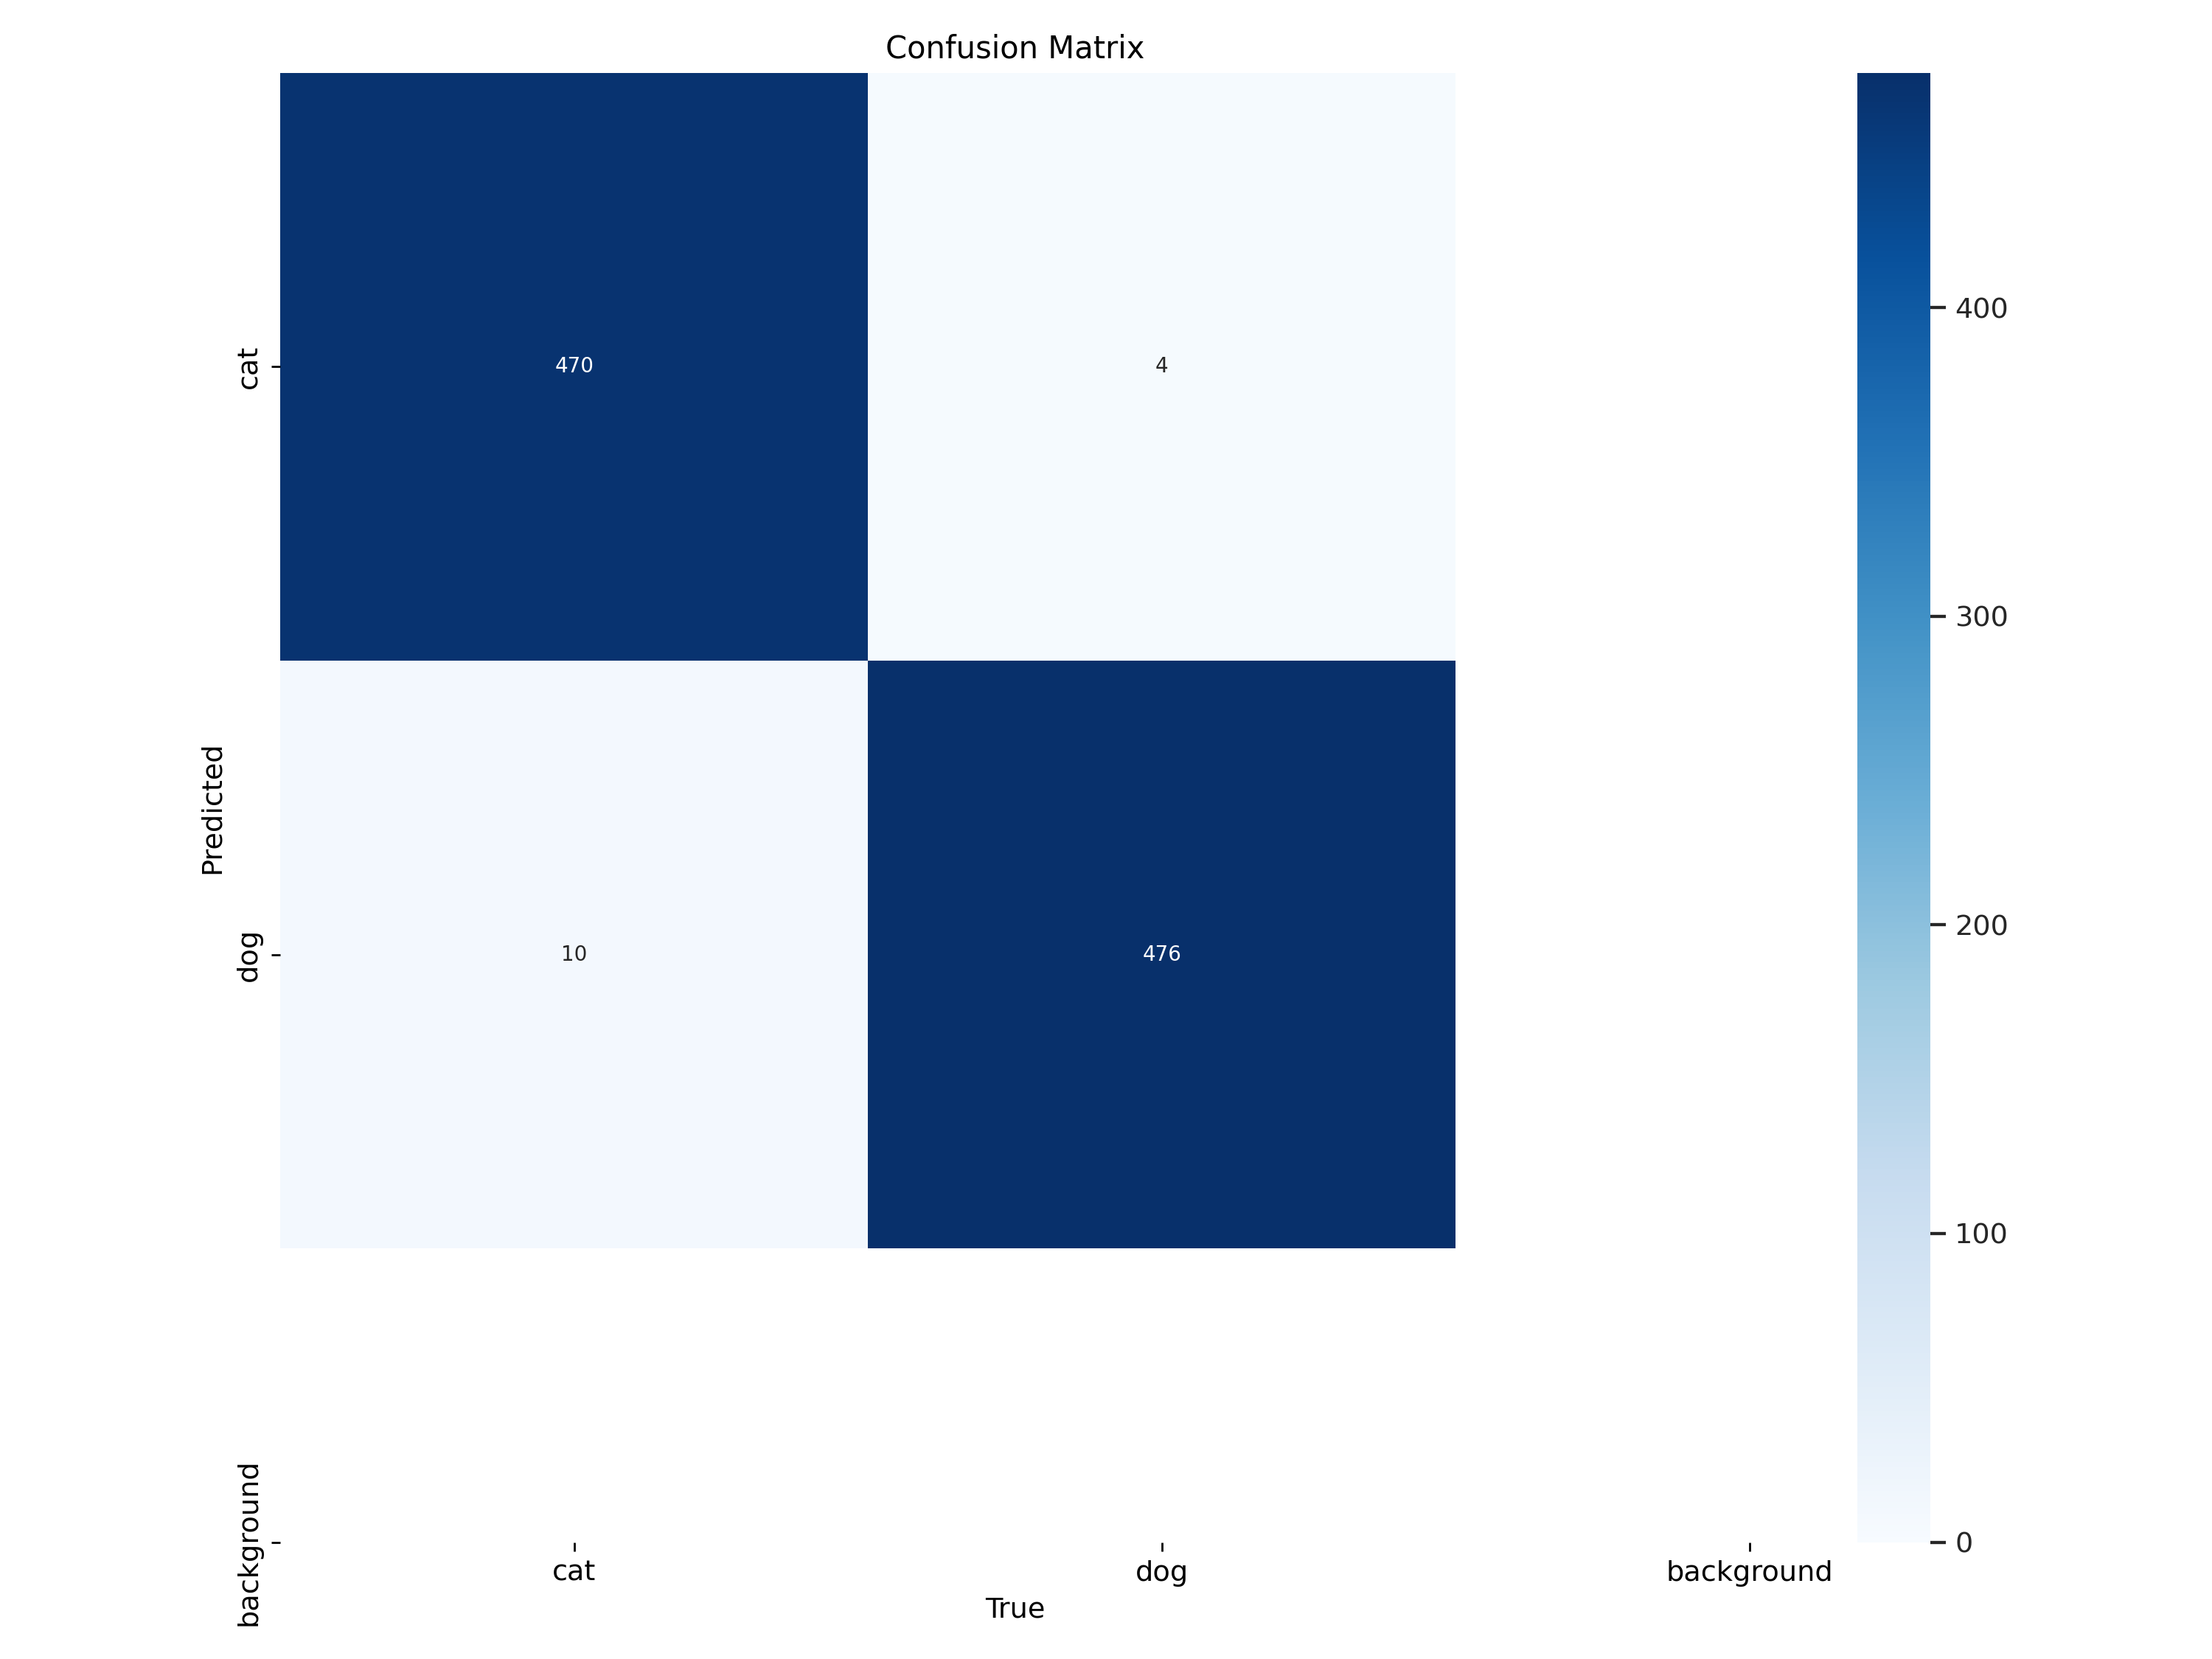

In [25]:
# Load and display the confusion matrix image
img_path = "/content/runs/classify/val/confusion_matrix.png"
img = Image.open(img_path)
display(img)

**Labels**

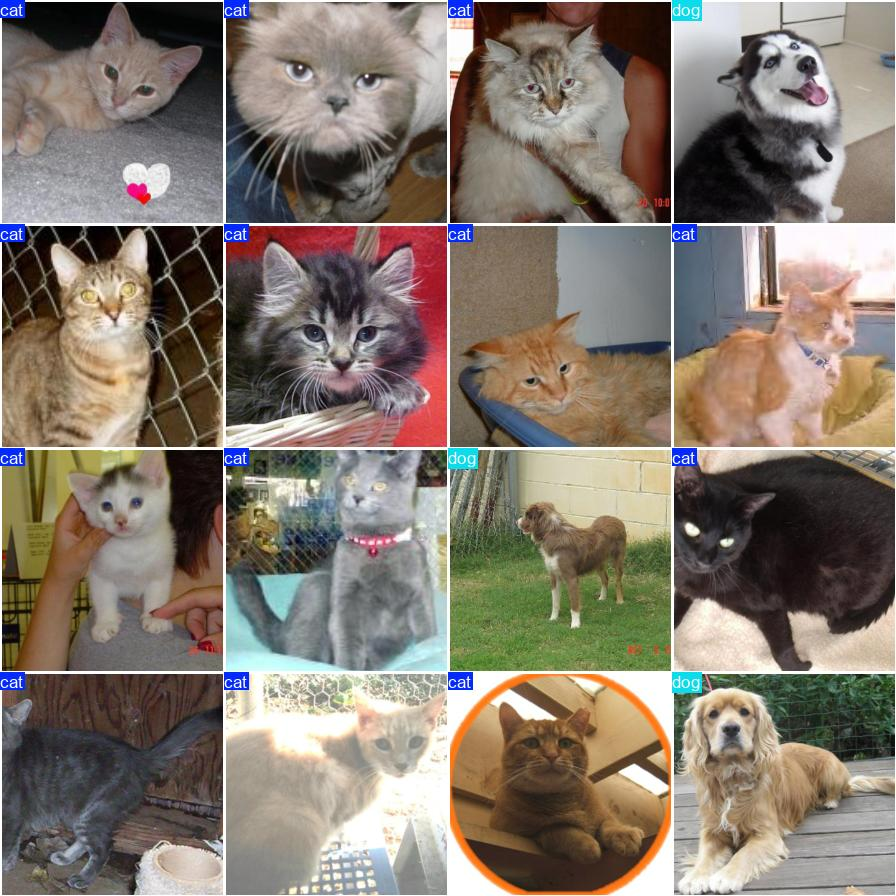

In [28]:
img_path = "/content/runs/classify/val/val_batch0_labels.jpg"
img = Image.open(img_path)
display(img)

**Prediction**

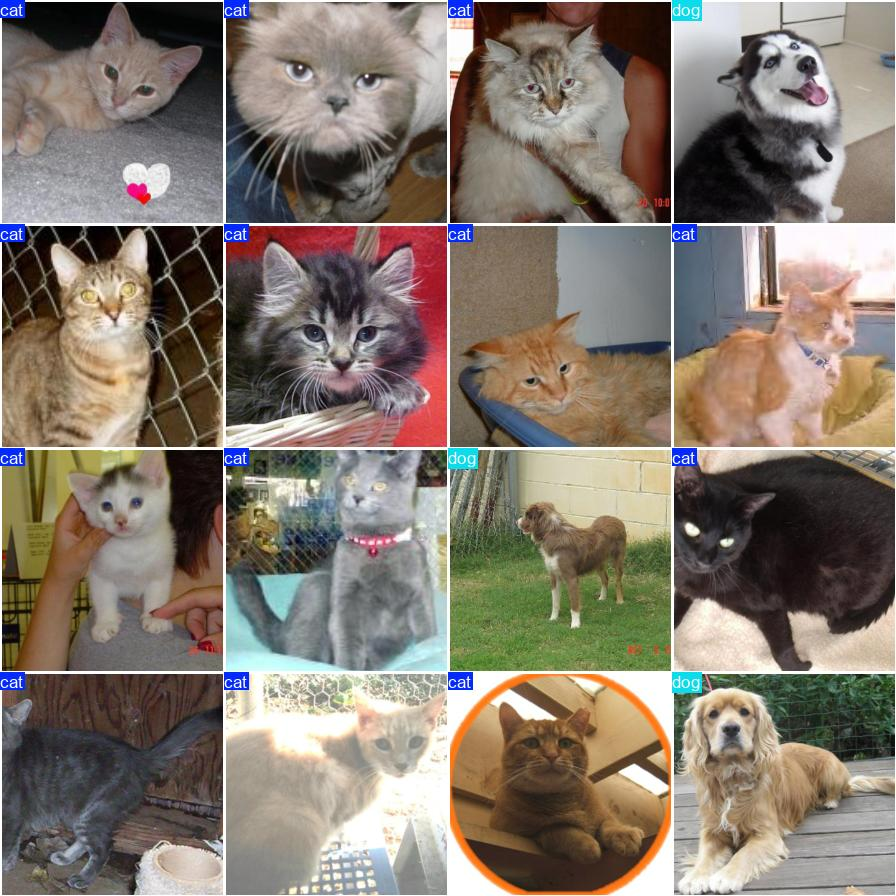

In [29]:
img_path = "/content/runs/classify/val/val_batch0_pred.jpg"
img = Image.open(img_path)
display(img)